In [1]:
import pandas as pd
import scipy.stats
import numpy as np

In [2]:
afrs = pd.read_csv("Afr.CaQTLS.new_filter.tsv", sep="\t", header=0)

In [3]:
afrs.shape

(219382, 48)

In [4]:
caqtls = pd.read_csv("Eu.new.CaQTLS.tsv", sep="\t", header=0)
caqtls = caqtls[caqtls["IsUsed"] & caqtls["Inside_Peak"]==1]


In [5]:
afrs = afrs[afrs["IsUsed"] & afrs["in_peaks"]]


In [6]:
afrs

,chr_hg38,pos_hg38,allele1,allele2,snp_id,label,IsUsed,in_peaks,pval,beta,...,chrombpnet.encsr095qnb.variantscore.jsd,chrombpnet.encsr095qnb.variantscore.csr,chrombpnet.encsr095qnb.variantscore.pval,dbsnp_rsid,region,snp,distance,se,abs_beta,id_hg19
4,chr1,905373,C,T,1_905373_T_C,False,True,True,0.188152,-0.130176,...,0.025277,0.003640,0.018781,rs4970382,1:904938:905544,1_905373_T_C,434,0.098145,0.130176,chr1_840753_T_C
13,chr1,959193,G,A,1_959193_G_A,False,True,True,0.570435,-0.048551,...,-0.010437,0.000299,0.136079,rs13303010,1:958757:959472,1_959193_G_A,435,0.085245,0.048551,chr1_894573_A_G
14,chr1,959339,C,T,1_959339_C_T,False,True,True,0.401773,0.071807,...,0.021064,0.001762,0.036620,rs187243360,1:958757:959472,1_959339_C_T,581,0.085227,0.071807,chr1_894719_C_T
16,chr1,960509,A,T,1_960509_A_T,False,True,True,0.786217,-0.024701,...,0.018586,0.001606,0.039693,rs72891151,1:960449:961416,1_960509_A_T,59,0.090793,0.024701,chr1_895889_A_T
17,chr1,960684,C,G,1_960684_C_G,False,True,True,0.316227,0.077054,...,-0.017779,0.000444,0.105717,rs113034360,1:960449:961416,1_960684_C_G,234,0.076444,0.077054,chr1_896064_C_G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219374,chr22,50621055,G,A,22_50621055_G_A,False,True,True,0.411079,0.094050,...,-0.024680,0.002349,0.028349,rs76733141,22:50620470:50621609,22_50621055_G_A,584,0.113873,0.094050,chr22_51059483_G_A
219376,chr22,50621621,G,A,22_50621621_G_A,False,True,True,0.203090,0.131361,...,-0.010963,0.000183,0.181022,rs11912237,22:50621616:50621880,22_50621621_G_A,4,0.102438,0.131361,chr22_51060049_G_A
219378,chr22,50628124,C,G,22_50628124_C_G,False,True,True,0.742636,0.021773,...,-0.025766,0.002166,0.030504,rs6151406,22:50627514:50628822,22_50628124_C_G,609,0.066098,0.021773,chr22_51066552_C_G
219379,chr22,50628493,G,A,22_50628493_G_A,False,True,True,0.729436,0.028973,...,0.017223,0.002840,0.023777,rs131715,22:50627514:50628822,22_50628493_G_A,978,0.083502,0.028973,chr22_51066921_G_A


In [7]:
sum(afrs["label"]==1)

6821

In [8]:
sum(afrs["label"]==0)

77999

In [9]:
min(afrs[afrs["label"]==0]["pval"])

0.00100034

In [10]:
max(afrs[afrs["label"]==0]["pval"])

0.999996

In [11]:
max(afrs[afrs["label"]==1]["pval"])

9.94985e-06

In [12]:
min(afrs[afrs["label"]==1]["pval"])

2.92178e-41

In [13]:
sum(afrs["label"]==1)+sum(afrs["label"]==0)

84820

In [14]:
afrs.shape

(84820, 48)

In [15]:
sum(afrs["label"]==1)/sum(afrs["label"]==0)

0.08744983910050129

In [16]:
max(afrs[afrs["label"]==1]["pval"])

9.94985e-06

In [17]:
min(afrs[afrs["label"]==1]["pval"])

2.92178e-41

In [18]:
afrs.columns

Index(['chr_hg38', 'pos_hg38', 'allele1', 'allele2', 'snp_id', 'label',
       'IsUsed', 'in_peaks', 'pval', 'beta',
       'enformer.encsr000emt.variantscore.sad',
       'enformer.encsr000emt.variantscore.sar', 'enformer_recomputed_x',
       'chrombpnet.gambian.variantscore.logfc',
       'chrombpnet.gambian.variantscore.jsd',
       'chrombpnet.esan.variantscore.logfc',
       'chrombpnet.esan.variantscore.jsd',
       'chrombpnet.mende.variantscore.logfc',
       'chrombpnet.mende.variantscore.jsd',
       'chrombpnet.yoruba.variantscore.logfc',
       'chrombpnet.yoruba.variantscore.jsd',
       'chrombpnet.maasai.variantscore.logfc',
       'chrombpnet.maasai.variantscore.jsd',
       'chrombpnet.luhya.variantscore.logfc',
       'chrombpnet.luhya.variantscore.jsd',
       'chrombpnet.encsr637xsc.variantscore.logfc',
       'chrombpnet.encsr637xsc.variantscore.jsd',
       'chrombpnet.encsr637xsc.variantscore.csr',
       'chrombpnet.encsr637xsc.variantscore.pval',
       'chrom

In [19]:
afrs["enformer_recomputed"] = afrs["enformer_recomputed_x"]

# AUPRC (benchmarking)

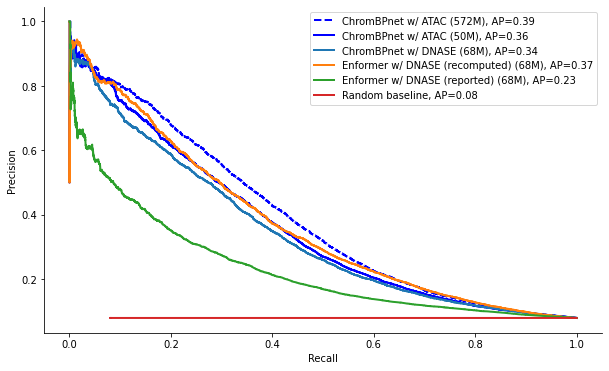

In [20]:

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import random
import os
import argparse
from sklearn.metrics import precision_recall_curve


fig, ax = plt.subplots(figsize=(10,6))

######################################

keyd="chrombpnet.encsr637xsc.variantscore.csr"

label=afrs["label"].astype(int)
score=abs(afrs[keyd])

title="ChromBPnet w/ ATAC (572M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', linestyle='dashed', label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="chrombpnet.encsr637xsc_50m.variantscore.csr"
label=afrs["label"].astype(int)
score=abs(afrs[keyd])

title="ChromBPnet w/ ATAC (50M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="chrombpnet.encsr000emt.variantscore.csr"
label=afrs["label"].astype(int)
score=abs(afrs[keyd])

title="ChromBPnet w/ DNASE (68M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

######################################



keyd="enformer_recomputed"
label=afrs["label"].astype(int)
score=abs(afrs[keyd])
title="Enformer w/ DNASE (recomputed) (68M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

# keyd="enformer.encsr000emt.variantscore.sad"
# label=afrs["label"].astype(int)
# score=abs(afrs[keyd])
# title="Enformer w/ DNASE SAD (50M)"

# fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
# roc_auc = metrics.average_precision_score(label, score)
# ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="enformer.encsr000emt.variantscore.sar"
label=afrs["label"].astype(int)
score=abs(afrs[keyd])
title="Enformer w/ DNASE (reported) (68M)"


fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))
enformer_auc = roc_auc

######################################

roc_auc=sum(afrs["label"]==1)/len(afrs["label"])
ax.plot(fpr_chrombpnet, [sum(afrs["label"]==1)/len(afrs["label"])]*len(fpr_chrombpnet), linewidth=2, label="Random baseline, AP="+str(round(roc_auc,2)))


ax.spines[["top", "right"]].set_visible(False)
ax.legend(loc='upper right')
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")

plt.savefig("subfigs/afr_caqtls_auprc.pdf", transparent=True, dpi=300)

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import random
import os
import argparse
from sklearn.metrics import precision_recall_curve

random_bc = []
chrombpnet = {}
enformer_dnase_roc = []
enformer_dnase_roc_sar = []

chrombpnet["ChromBPNet DNase (68M)"] = []
chrombpnet["ChromBPNet ATAC (572M)"] = []
chrombpnet["ChromBPNet ATAC (50M)"] = []

for threshold in np.arange(6,25,3):
    threshold = 9.94985 / (10**(threshold))
    print(threshold)
    dataf1 = afrs[afrs["pval"]<threshold]
    dataf1["label"] = 1
    dataf1 = dataf1[["chrombpnet.encsr000emt.variantscore.csr", 
                    "chrombpnet.encsr637xsc.variantscore.csr",
                     "chrombpnet.encsr637xsc_50m.variantscore.csr",
                    "enformer.encsr000emt.variantscore.sar",  "enformer_recomputed", "label"]]
    
    dataf2 = afrs[afrs["label"]==0]
    dataf2 = dataf2[["chrombpnet.encsr000emt.variantscore.csr", 
                    "chrombpnet.encsr637xsc.variantscore.csr",
                     "chrombpnet.encsr637xsc_50m.variantscore.csr",
                    "enformer.encsr000emt.variantscore.sar",  "enformer_recomputed", "label"]]

#     dataf2 = caqtls[(caqtls["Log10_BF"]<-1)]
#     dataf2["chrombpnet.encsr637xsc.variantscore.csr"] = caqtls["ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean"]
#     dataf2["chrombpnet.encsr637xsc_50m.variantscore.csr"] = caqtls["ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean"]
#     dataf2["chrombpnet.encsr000emt.variantscore.csr"] = caqtls["ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean"]
#     dataf2["enformer.encsr000emt.variantscore.sar"] = caqtls["DNASE_SAR"]
#     dataf2["enformer_recomputed"] = caqtls["enformer_recomputed"]
#     dataf2["label"] = 0
    
    dataf = pd.concat([dataf1, dataf2])
    
    total = dataf.shape[0]
    sigs = sum(dataf["label"])
    print("sig",sigs)
    print(total)
    print(np.round(sigs/total,3))
    
    random_bc.append(np.round(sigs/total,3))
    
    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["chrombpnet.encsr000emt.variantscore.csr"]))
    chrombpnet["ChromBPNet DNase (68M)"].append(roc_auc)

    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["chrombpnet.encsr637xsc.variantscore.csr"]))
    chrombpnet["ChromBPNet ATAC (572M)"].append(roc_auc)

    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["chrombpnet.encsr637xsc_50m.variantscore.csr"]))
    chrombpnet["ChromBPNet ATAC (50M)"].append(roc_auc)
    
    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["enformer_recomputed"]))
    enformer_dnase_roc.append(roc_auc)

    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["enformer.encsr000emt.variantscore.sar"]))
    enformer_dnase_roc_sar.append(roc_auc)


9.94985e-06
sig 6819
84818
0.08
9.94985e-09
sig 3705
81704
0.045


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


9.94985e-12
sig 2257
80256
0.028
9.94985e-15
sig 1471
79470
0.019
9.94985e-18
sig 931
78930
0.012
2.5671599685918016e-18
sig 834
78833
0.011
4.965579270327687e-18
sig 884
78883
0.011


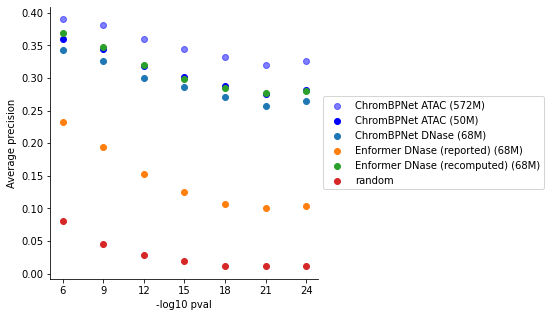

In [61]:

fig, ax = plt.subplots(figsize=(6,5))
colors = ["blue", "blue"]
alphas = [0.5, 1.0]
idx=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)"]:
    ax.scatter(np.arange(6,25,3).astype(str), chrombpnet[key], label=key, c="blue", alpha=alphas[idx])
    idx+=1
    
key="ChromBPNet DNase (68M)"
ax.scatter(np.arange(6,25,3).astype(str), chrombpnet[key], label=key)
ax.scatter(np.arange(6,25,3).astype(str), enformer_dnase_roc_sar, label="Enformer DNase (reported) (68M)")
ax.scatter(np.arange(6,25,3).astype(str), enformer_dnase_roc, label="Enformer DNase (recomputed) (68M)")

ax.scatter(np.arange(6,25,3).astype(str), random_bc, label="random")

ax.spines[["top", "right"]].set_visible(False)
ax.set_xlabel("-log10 pval")
ax.set_ylabel("Average precision")
#plt.legend(loc='upper right')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.savefig("subfigs/afr_caqtls_auprc_compare.pdf", transparent=True, dpi=300)

# Pearsonr (benchmarking)

In [23]:
dataf = afrs
pearsonrs = []

dataf['enformer_recomputed'] = -1*dataf['enformer_recomputed']
keyd='chrombpnet.encsr637xsc.variantscore.logfc'
print("ChromBPNet ATAC: ", np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))

keyd='chrombpnet.encsr637xsc_50m.variantscore.logfc'
print("ChromBPNet ATAC (50M): ", np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))

keyd='chrombpnet.encsr000emt.variantscore.logfc'
print("ChromBPNet DNase: ", np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))

keyd='enformer_recomputed'
print("Enformer: ",np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))

keyd='enformer.encsr000emt.variantscore.sar'
print("Enformer: ",np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))

keyd='chrombpnet.encsr637xsc.variantscore.logfc'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[1])
keyd='chrombpnet.encsr637xsc_50m.variantscore.logfc'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[1])
keyd='chrombpnet.encsr000emt.variantscore.logfc'
print("ChromBPNet DNase: ", scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[1])
keyd='enformer_recomputed'
print("Enformer: ", scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[1])
keyd='enformer.encsr000emt.variantscore.sar'
print("Enformer: ", scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[1])



ChromBPNet ATAC:  0.69
ChromBPNet ATAC (50M):  0.66
ChromBPNet DNase:  0.67
Enformer:  0.63
Enformer:  0.49
ChromBPNet ATAC:  0.0
ChromBPNet ATAC:  0.0
ChromBPNet DNase:  0.0
Enformer:  0.0
Enformer:  0.0


In [24]:
pearsonr_abs = []
keyd='chrombpnet.encsr637xsc.variantscore.logfc'
print("ChromBPNet ATAC: ", np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))
pearsonr_abs.append(np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))

keyd='chrombpnet.encsr637xsc_50m.variantscore.logfc'
print("ChromBPNet ATAC (50M): ", np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))
pearsonr_abs.append(np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))

keyd='chrombpnet.encsr000emt.variantscore.logfc'
print("ChromBPNet DNase: ", np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))
pearsonr_abs.append(np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))

keyd='enformer_recomputed'
print("Enformer: ", np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))
pearsonr_abs.append(np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))

keyd='enformer.encsr000emt.variantscore.sar'
print("Enformer: ", np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))
pearsonr_abs.append(np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))


keyd='chrombpnet.encsr637xsc.variantscore.logfc'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[1])
keyd='chrombpnet.encsr637xsc_50m.variantscore.logfc'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[1])
keyd='chrombpnet.encsr000emt.variantscore.logfc'
print("ChromBPNet DNase: ", scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[1])
keyd='enformer_recomputed'
print("Enformer SAD: ", scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[1])
keyd='enformer.encsr000emt.variantscore.sar'
print("Enformer SAR: ", scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[1])


ChromBPNet ATAC:  0.38
ChromBPNet ATAC (50M):  0.37
ChromBPNet DNase:  0.38
Enformer:  0.29
Enformer:  0.11
ChromBPNet ATAC:  1.9237148658787595e-238
ChromBPNet ATAC:  2.301462737345662e-220
ChromBPNet DNase:  8.332655777196384e-227
Enformer SAD:  7.284298367169e-129
Enformer SAR:  2.3616044014841508e-18


In [25]:
df= pd.DataFrame()

df["pearsonr"] = pearsonrs + pearsonr_abs
df["method"] = ["ChromBPNet ATAC (500M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)", "Enformer (recomputed) DNase (68M)", "Enformer (reported) DNase (68M)"] + ["ChromBPNet ATAC (500M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)", "Enformer (recomputed) DNase (68M)", "Enformer (reported) DNase (68M)"]
df["scoring"] = ["signed"]*len(pearsonrs) + ["unsigned"]*len(pearsonr_abs)
df["score"] = ["logfc"] * df.shape[0]
df["pearsonr"] = df["pearsonr"].astype(float)
df

,pearsonr,method,scoring,score
0,0.69,ChromBPNet ATAC (500M),signed,logfc
1,0.66,ChromBPNet ATAC (50M),signed,logfc
2,0.67,ChromBPNet DNase (68M),signed,logfc
3,0.63,Enformer (recomputed) DNase (68M),signed,logfc
4,0.49,Enformer (reported) DNase (68M),signed,logfc
5,0.38,ChromBPNet ATAC (500M),unsigned,logfc
6,0.37,ChromBPNet ATAC (50M),unsigned,logfc
7,0.38,ChromBPNet DNase (68M),unsigned,logfc
8,0.29,Enformer (recomputed) DNase (68M),unsigned,logfc
9,0.11,Enformer (reported) DNase (68M),unsigned,logfc


In [26]:
dataf = afrs
pearsonrs = []
keyd='chrombpnet.encsr637xsc.variantscore.jsd'
print("ChromBPNet ATAC: ", np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))

keyd='chrombpnet.encsr637xsc_50m.variantscore.jsd'
print("ChromBPNet ATAC (50M): ", np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))

keyd='chrombpnet.encsr000emt.variantscore.jsd'
print("ChromBPNet DNase: ", np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[0],2))

keyd='chrombpnet.encsr637xsc.variantscore.jsd'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[1])
keyd='chrombpnet.encsr637xsc_50m.variantscore.jsd'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[1])
keyd='chrombpnet.encsr000emt.variantscore.jsd'
print("ChromBPNet DNase: ", scipy.stats.pearsonr(dataf[keyd][dataf["label"]==1], dataf["beta"][dataf["label"]==1])[1])



ChromBPNet ATAC:  0.65
ChromBPNet ATAC (50M):  0.64
ChromBPNet DNase:  0.67
ChromBPNet ATAC:  0.0
ChromBPNet ATAC:  0.0
ChromBPNet DNase:  0.0


In [27]:
pearsonr_abs = []
keyd='chrombpnet.encsr637xsc.variantscore.jsd'
print("ChromBPNet ATAC: ", np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))
pearsonr_abs.append(np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))

keyd='chrombpnet.encsr637xsc_50m.variantscore.jsd'
print("ChromBPNet ATAC (50M): ", np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))
pearsonr_abs.append(np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))

keyd='chrombpnet.encsr000emt.variantscore.jsd'
print("ChromBPNet DNase: ", np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))
pearsonr_abs.append(np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[0],2))


keyd='chrombpnet.encsr637xsc.variantscore.jsd'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[1])
keyd='chrombpnet.encsr637xsc_50m.variantscore.jsd'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[1])
keyd='chrombpnet.encsr000emt.variantscore.jsd'
print("ChromBPNet DNase: ", scipy.stats.pearsonr(abs(dataf[keyd])[dataf["label"]==1], abs(dataf["beta"])[dataf["label"]==1])[1])


ChromBPNet ATAC:  0.34
ChromBPNet ATAC (50M):  0.32
ChromBPNet DNase:  0.34
ChromBPNet ATAC:  1.2898078859520728e-179
ChromBPNet ATAC:  1.8304213920818472e-167
ChromBPNet DNase:  8.492320480992387e-188


In [28]:
df1= pd.DataFrame()

df1["pearsonr"] = pearsonrs + pearsonr_abs
df1["method"] = ["ChromBPNet ATAC (500M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"] + ["ChromBPNet ATAC (500M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]
df1["scoring"] = ["signed"]*len(pearsonrs) + ["unsigned"]*len(pearsonr_abs)
df1["score"] = ["jsd"] * df1.shape[0]
df1["pearsonr"] = df["pearsonr"].astype(float)
df1

,pearsonr,method,scoring,score
0,0.69,ChromBPNet ATAC (500M),signed,jsd
1,0.66,ChromBPNet ATAC (50M),signed,jsd
2,0.67,ChromBPNet DNase (68M),signed,jsd
3,0.63,ChromBPNet ATAC (500M),unsigned,jsd
4,0.49,ChromBPNet ATAC (50M),unsigned,jsd
5,0.38,ChromBPNet DNase (68M),unsigned,jsd


In [29]:
df = pd.concat((df, df1))

In [30]:
df

,pearsonr,method,scoring,score
0,0.69,ChromBPNet ATAC (500M),signed,logfc
1,0.66,ChromBPNet ATAC (50M),signed,logfc
2,0.67,ChromBPNet DNase (68M),signed,logfc
3,0.63,Enformer (recomputed) DNase (68M),signed,logfc
4,0.49,Enformer (reported) DNase (68M),signed,logfc
5,0.38,ChromBPNet ATAC (500M),unsigned,logfc
6,0.37,ChromBPNet ATAC (50M),unsigned,logfc
7,0.38,ChromBPNet DNase (68M),unsigned,logfc
8,0.29,Enformer (recomputed) DNase (68M),unsigned,logfc
9,0.11,Enformer (reported) DNase (68M),unsigned,logfc


0    0.69
1    0.66
2    0.67
3    0.63
4    0.49
5    0.38
6    0.37
7    0.38
8    0.29
9    0.11
0    0.69
1    0.66
2    0.67
3    0.63
4    0.49
5    0.38
Name: pearsonr, dtype: float64
{'ChromBPNet ATAC (500M)', 'ChromBPNet DNase (68M)', 'Enformer (recomputed) DNase (68M)', 'ChromBPNet ATAC (50M)', 'Enformer (reported) DNase (68M)'}


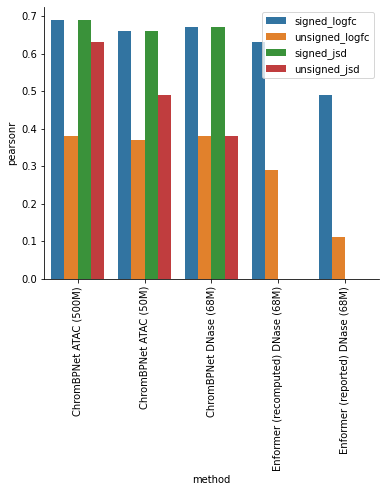

In [31]:
import seaborn as sns
import matplotlib
plt.figure(figsize=(6,5))

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 
print(df["pearsonr"])
df["scoring-methods"] = df["scoring"] + "_" +  df["score"]
ax = sns.barplot(data=df, x="method", y="pearsonr", hue="scoring-methods")
print(set(df["method"]))
xtix = ["ChromBPNet ATAC (500M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)", "Enformer (recomputed) DNase (68M)", "Enformer (reported) DNase (68M)"]
ax.set_xticklabels(labels=xtix, rotation=90)
ax.spines[["top", "right"]].set_visible(False)

ax.legend(loc="upper right")

(0.6863082060539054, 0.0)
(0.38392145980073195, 1.9237148658787595e-238)


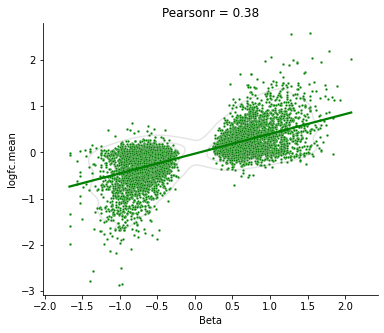

In [40]:

   
data = pd.DataFrame()
data["logfc.mean"] = afrs[afrs["label"]==1]["chrombpnet.encsr637xsc.variantscore.logfc"]
data["Beta"] = afrs[afrs["label"]==1]["beta"]

plt.figure(figsize=(6,5))

sns.kdeplot(
    data=data,
    x="Beta",
    y="logfc.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)


ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=6, color="green", rasterized=True)
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="green")
ax.spines[["top", "right"]].set_visible(False)

atc_pear = scipy.stats.pearsonr(data["logfc.mean"],data["Beta"])
print(atc_pear)
atc_pear = scipy.stats.pearsonr(abs(data["logfc.mean"]),abs(data["Beta"]))
print(atc_pear)
ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))


plt.savefig("subfigs/afr_caqtls_pearsonr.pdf", transparent=True, dpi=300)

(0.5245842317293431, 4.963181862567866e-55)


Text(0.5, 1.0, 'Pearsonr = 0.52')

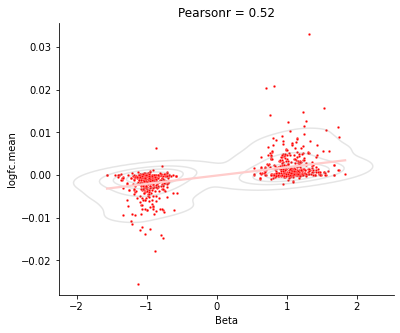

In [35]:

   
data = pd.DataFrame()
data["logfc.mean"] = dataf[dataf["label"]==1]["enformer.encsr000emt.variantscore.sad"]
data["Beta"] = dataf[dataf["label"]==1]["beta"]

plt.figure(figsize=(6,5))

sns.kdeplot(
    data=data,
    x="Beta",
    y="logfc.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)


ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=6, color="Red")
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="#ffcccb")
ax.spines[["top", "right"]].set_visible(False)

atc_pear = scipy.stats.pearsonr(data["logfc.mean"],data["Beta"])
print(atc_pear)
ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))



In [36]:
import scipy.stats



chrombpnet = {}
chrombpnet_unsigned = {}
enformer = []
enformer_unsigned = []
enformer_sar = []
enformer_unsigned_sar = []
chrombpnet["ChromBPNet DNase (68M)"] = []
chrombpnet["ChromBPNet ATAC (572M)"] = []
chrombpnet["ChromBPNet ATAC (50M)"] = []

chrombpnet_unsigned["ChromBPNet DNase (68M)"] = []
chrombpnet_unsigned["ChromBPNet ATAC (572M)"] = []
chrombpnet_unsigned["ChromBPNet ATAC (50M)"] = []

for threshold in np.arange(6,25,3):
    threshold = 1 / (10**(threshold))
    print(threshold)
    dataf = afrs[afrs["pval"]<threshold]

      
    pear = scipy.stats.pearsonr(dataf["chrombpnet.encsr000emt.variantscore.logfc"], dataf["beta"])
    chrombpnet["ChromBPNet DNase (68M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["chrombpnet.encsr000emt.variantscore.logfc"]), abs(dataf["beta"]))
    chrombpnet_unsigned["ChromBPNet DNase (68M)"].append(pear[0])    
 
    pear = scipy.stats.pearsonr(dataf["chrombpnet.encsr637xsc.variantscore.logfc"], dataf["beta"])
    chrombpnet["ChromBPNet ATAC (572M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["chrombpnet.encsr637xsc.variantscore.logfc"]), abs(dataf["beta"]))
    chrombpnet_unsigned["ChromBPNet ATAC (572M)"].append(pear[0])    

    pear = scipy.stats.pearsonr(dataf["chrombpnet.encsr637xsc_50m.variantscore.logfc"], dataf["beta"])
    chrombpnet["ChromBPNet ATAC (50M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["chrombpnet.encsr637xsc_50m.variantscore.logfc"]), abs(dataf["beta"]))
    chrombpnet_unsigned["ChromBPNet ATAC (50M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(dataf["enformer_recomputed"], dataf["beta"])
    enformer.append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["enformer_recomputed"]), abs(dataf["beta"]))
    enformer_unsigned.append(pear[0])

    pear = scipy.stats.pearsonr(dataf["enformer.encsr000emt.variantscore.sar"], dataf["beta"])
    enformer_sar.append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["enformer.encsr000emt.variantscore.sar"]), abs(dataf["beta"]))
    enformer_unsigned_sar.append(pear[0])


1e-06
1e-09
1e-12
1e-15
1e-18
2.5800991659088344e-19
4.990607165261473e-19


[0.6983690193932983, 0.7189548152927936, 0.7295209713273648, 0.7373501709489557, 0.7442226433050187, 0.7469131420307702, 0.7446218027253718]
[0.6743140122287863, 0.6955496292567133, 0.7058122936418465, 0.7135073170669227, 0.7199681600724328, 0.7236989890628697, 0.7204562995516648]
[0.6827702620416447, 0.7050972038615901, 0.7177419947236471, 0.7275573594743634, 0.7347780426308606, 0.7380142624179875, 0.7353225305932436]


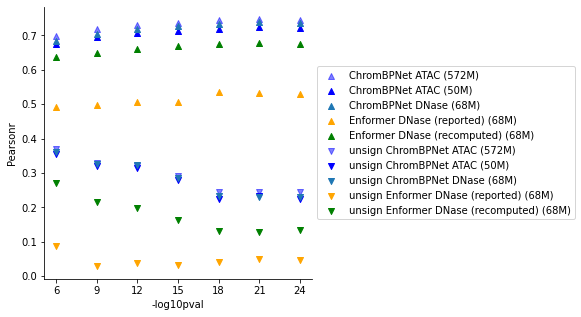

In [37]:
fig, ax = plt.subplots(figsize=(6,5))

colors = ["blue", "blue", "C0"]
alphas= [0.5, 1.0, 1.0, 1.0] 

i=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]:
    ax.scatter(np.arange(6,25,3).astype(str), chrombpnet[key], marker="^", label=key, color=colors[i], alpha=alphas[i])
    i+=1
    print(chrombpnet[key])


ax.scatter(np.arange(6,25,3).astype(str), enformer_sar ,  marker="^", label="Enformer DNase (reported) (68M)", color="orange")
ax.scatter(np.arange(6,25,3).astype(str), enformer ,  marker="^", label="Enformer DNase (recomputed) (68M)", color="green")

i=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]:
    ax.scatter(np.arange(6,25,3).astype(str), chrombpnet_unsigned[key], marker="v", label="unsign "+key, color=colors[i], alpha=alphas[i])
    i+=1
    
ax.scatter(np.arange(6,25,3).astype(str), enformer_unsigned_sar, marker="v", label="unsign " +"Enformer DNase (reported) (68M)", color="orange")
ax.scatter(np.arange(6,25,3).astype(str), enformer_unsigned, marker="v", label="unsign " +"Enformer DNase (recomputed) (68M)", color="green")


ax.spines[["top", "right"]].set_visible(False)
ax.set_xlabel("-log10pval")
ax.set_ylabel("Pearsonr")
#plt.legend(loc='upper right')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.show()

plt.savefig("subfigs/afr_caqtls_pearsonr_compare.pdf", transparent=True, dpi=300)


In [38]:
import scipy.stats



chrombpnet = {}
chrombpnet_unsigned = {}

chrombpnet["ChromBPNet DNase (68M)"] = []
chrombpnet["ChromBPNet ATAC (572M)"] = []
chrombpnet["ChromBPNet ATAC (50M)"] = []

chrombpnet_unsigned["ChromBPNet DNase (68M)"] = []
chrombpnet_unsigned["ChromBPNet ATAC (572M)"] = []
chrombpnet_unsigned["ChromBPNet ATAC (50M)"] = []

for threshold in np.arange(6,25,3):
    threshold = 1 / (10**(threshold))
    print(threshold)
    dataf = afrs[afrs["pval"]<threshold]

      
    pear = scipy.stats.pearsonr(dataf["chrombpnet.encsr000emt.variantscore.jsd"], dataf["beta"])
    chrombpnet["ChromBPNet DNase (68M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["chrombpnet.encsr000emt.variantscore.jsd"]), abs(dataf["beta"]))
    chrombpnet_unsigned["ChromBPNet DNase (68M)"].append(pear[0])    
 
    pear = scipy.stats.pearsonr(dataf["chrombpnet.encsr637xsc.variantscore.jsd"], dataf["beta"])
    chrombpnet["ChromBPNet ATAC (572M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["chrombpnet.encsr637xsc.variantscore.jsd"]), abs(dataf["beta"]))
    chrombpnet_unsigned["ChromBPNet ATAC (572M)"].append(pear[0])    

    pear = scipy.stats.pearsonr(dataf["chrombpnet.encsr637xsc_50m.variantscore.jsd"], dataf["beta"])
    chrombpnet["ChromBPNet ATAC (50M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["chrombpnet.encsr637xsc_50m.variantscore.jsd"]), abs(dataf["beta"]))
    chrombpnet_unsigned["ChromBPNet ATAC (50M)"].append(pear[0])
    


1e-06
1e-09
1e-12
1e-15
1e-18
2.5800991659088344e-19
4.990607165261473e-19


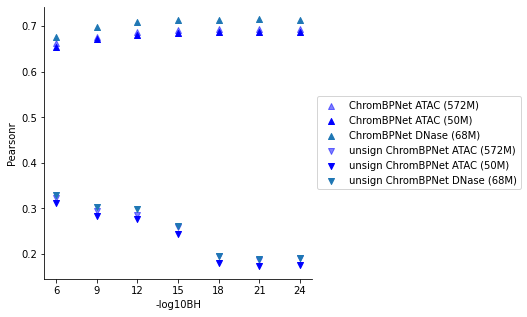

In [39]:
fig, ax = plt.subplots(figsize=(6,5))

colors = ["blue", "blue", "C0"]
alphas= [0.5, 1.0, 1.0, 1.0] 


i=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]:
    ax.scatter(np.arange(6,25,3).astype(str), chrombpnet[key], marker="^", label=key, color=colors[i], alpha=alphas[i])
    i+=1


# ax.scatter(np.arange(6,25,3).astype(str), enformer_sar ,  marker="^", label="Enformer DNase SAR (68M)", color="orange")
# ax.scatter(np.arange(6,25,3).astype(str), enformer ,  marker="^", label="Enformer DNase SAD (68M)", color="green")

i=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]:
    ax.scatter(np.arange(6,25,3).astype(str), chrombpnet_unsigned[key], marker="v", label="unsign "+key, color=colors[i], alpha=alphas[i])
    i+=1
    
# ax.scatter(np.arange(6,25,3).astype(str), enformer_unsigned_sar, marker="v", label="unsign " +"Enformer DNase SAR (68M)", color="orange")
# ax.scatter(np.arange(6,25,3).astype(str), enformer_unsigned, marker="v", label="unsign " +"Enformer DNase SAD (68M)", color="green")


ax.spines[["top", "right"]].set_visible(False)
ax.set_xlabel("-log10BH")
ax.set_ylabel("Pearsonr")
#plt.legend(loc='upper right')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.show()

plt.savefig("subfigs/afr_caqtls_pearsonr_compare_jsd.pdf", transparent=True, dpi=300)


# Pearsonr (across-ancestry)

In [42]:
dataf = afrs[afrs["label"]==1]
dataf.columns
 

Index(['chr_hg38', 'pos_hg38', 'allele1', 'allele2', 'snp_id', 'label',
       'IsUsed', 'in_peaks', 'pval', 'beta',
       'enformer.encsr000emt.variantscore.sad',
       'enformer.encsr000emt.variantscore.sar', 'enformer_recomputed_x',
       'chrombpnet.gambian.variantscore.logfc',
       'chrombpnet.gambian.variantscore.jsd',
       'chrombpnet.esan.variantscore.logfc',
       'chrombpnet.esan.variantscore.jsd',
       'chrombpnet.mende.variantscore.logfc',
       'chrombpnet.mende.variantscore.jsd',
       'chrombpnet.yoruba.variantscore.logfc',
       'chrombpnet.yoruba.variantscore.jsd',
       'chrombpnet.maasai.variantscore.logfc',
       'chrombpnet.maasai.variantscore.jsd',
       'chrombpnet.luhya.variantscore.logfc',
       'chrombpnet.luhya.variantscore.jsd',
       'chrombpnet.encsr637xsc.variantscore.logfc',
       'chrombpnet.encsr637xsc.variantscore.jsd',
       'chrombpnet.encsr637xsc.variantscore.csr',
       'chrombpnet.encsr637xsc.variantscore.pval',
       'chrom

In [45]:
# anscs = dataf.columns[11:-6].tolist()
# anscs = [ans.split(".")[1] for ans in anscs]
# anscs = set(anscs)
# print(anscs)
anscs = {'esan', 'luhya', 'encsr637xsc_50m', 'mende', 'yoruba', 'maasai', 'encsr095qnb', 'gambian', 'encsr000emt', 'encsr637xsc'}

In [46]:

ancestries = []

for ans in anscs:
    if ans=="eur":
        continue
    if ans=="afr":
        continue
    if ans == "GM12878":
        for title in ["encsr637xsc", "encsr000emt", "encsr637xsc_50m", "encsr000emt.ENCSR095QNB" ]:
            ancestries.append(ans+title)
    else:
        ancestries.append(ans)
    
abs_logfc_dict = {x: [] for x in ancestries}
abs_logfc_dict['ancestry'] = []

for outer_ancestry in ancestries:
    abs_logfc_dict['ancestry'].append(outer_ancestry)
    for ancestry in ancestries:
        #print("chrombpnet.encsr637xsc.variantscore.logfc".replace("encsr637xsc", ancestry))

        abs_logfc_dict[ancestry].append(scipy.stats.pearsonr(dataf["chrombpnet.encsr637xsc.variantscore.logfc".replace("encsr637xsc", outer_ancestry)],
                                                 dataf["chrombpnet.encsr637xsc.variantscore.logfc".replace("encsr637xsc", ancestry)])[0])
        
abs_logfc_df = pd.DataFrame(abs_logfc_dict)
abs_logfc_df.set_index('ancestry', inplace=True)

abs_logfc_df    


,esan,maasai,yoruba,encsr095qnb,encsr000emt,gambian,encsr637xsc,encsr637xsc_50m,luhya,mende
ancestry,,,,,,,,,,
esan,1.000000,0.962213,0.970371,0.928157,0.946298,0.965898,0.949169,0.933165,0.968656,0.969244
maasai,0.962213,1.000000,0.965313,0.922630,0.949146,0.968507,0.945036,0.932632,0.969797,0.966338
yoruba,0.970371,0.965313,1.000000,0.929201,0.942193,0.968802,0.950110,0.930489,0.971073,0.969247
encsr095qnb,0.928157,0.922630,0.929201,1.000000,0.934232,0.932394,0.960970,0.958289,0.931905,0.934637
encsr000emt,0.946298,0.949146,0.942193,0.934232,1.000000,0.952491,0.952417,0.958030,0.946711,0.951359
gambian,0.965898,0.968507,0.968802,0.932394,0.952491,1.000000,0.955324,0.937421,0.970706,0.972954
encsr637xsc,0.949169,0.945036,0.950110,0.960970,0.952417,0.955324,1.000000,0.966690,0.951238,0.954590
encsr637xsc_50m,0.933165,0.932632,0.930489,0.958289,0.958030,0.937421,0.966690,1.000000,0.937484,0.940570
luhya,0.968656,0.969797,0.971073,0.931905,0.946711,0.970706,0.951238,0.937484,1.000000,0.970165


Text(0.5, 1.05, 'Ancestry vs. Ancestry ChromBPNet Absolute LogFC Pearson Correlation')

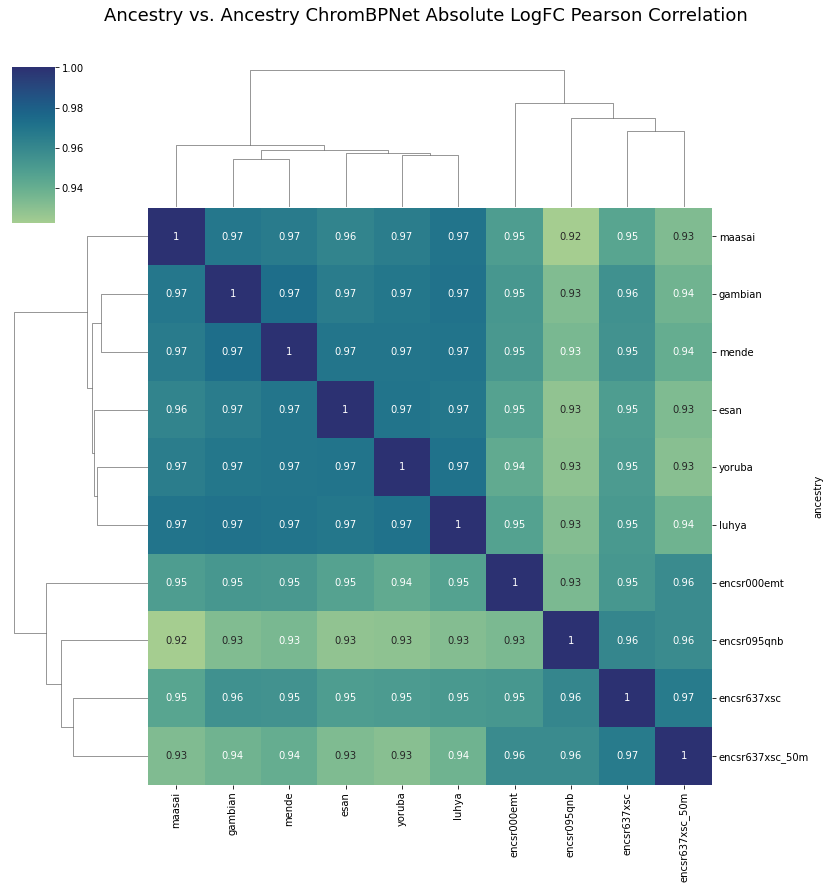

In [47]:
g = sns.clustermap(abs_logfc_df, annot=True, cmap="crest")
g.fig.set_figwidth(12)
g.fig.set_figheight(12)
g.fig.suptitle('Ancestry vs. Ancestry ChromBPNet Absolute LogFC Pearson Correlation', fontsize=18, y=1.05)

#plt.savefig("subfigs/afr_caqtls_ancestry_logfc.pdf", transparent=True, dpi=300)


In [48]:

ancestries = []

for ans in anscs:
    if ans=="eur":
        continue
    if ans=="afr":
        continue
    if ans == "GM12878":
        for title in ["encsr637xsc", "encsr000emt", "encsr637xsc_50m", "encsr000emt.ENCSR095QNB" ]:
            ancestries.append(ans+title)
    else:
        ancestries.append(ans)
    
abs_logfc_dict = {x: [] for x in ancestries}
abs_logfc_dict['ancestry'] = []

for outer_ancestry in ancestries:
    print(outer_ancestry)
    abs_logfc_dict['ancestry'].append(outer_ancestry)
    for ancestry in ancestries:
        abs_logfc_dict[ancestry].append(scipy.stats.pearsonr(dataf["chrombpnet.encsr637xsc.variantscore.jsd".replace("encsr637xsc", outer_ancestry)],
                                                 dataf["chrombpnet.encsr637xsc.variantscore.jsd".replace("encsr637xsc", ancestry)])[0])
        
abs_logfc_df = pd.DataFrame(abs_logfc_dict)
abs_logfc_df.set_index('ancestry', inplace=True)

abs_logfc_df    


esan
maasai
yoruba
encsr095qnb
encsr000emt
gambian
encsr637xsc
encsr637xsc_50m
luhya
mende


,esan,maasai,yoruba,encsr095qnb,encsr000emt,gambian,encsr637xsc,encsr637xsc_50m,luhya,mende
ancestry,,,,,,,,,,
esan,1.000000,0.956347,0.959848,0.939054,0.925145,0.959481,0.942877,0.942284,0.959814,0.960258
maasai,0.956347,1.000000,0.960483,0.935312,0.930455,0.966666,0.946207,0.946024,0.965104,0.962058
yoruba,0.959848,0.960483,1.000000,0.943358,0.931674,0.963991,0.950856,0.946661,0.966400,0.964158
encsr095qnb,0.939054,0.935312,0.943358,1.000000,0.931924,0.942130,0.953984,0.949909,0.939205,0.940732
encsr000emt,0.925145,0.930455,0.931674,0.931924,1.000000,0.936890,0.934557,0.940561,0.927627,0.934885
gambian,0.959481,0.966666,0.963991,0.942130,0.936890,1.000000,0.950917,0.950066,0.966610,0.968532
encsr637xsc,0.942877,0.946207,0.950856,0.953984,0.934557,0.950917,1.000000,0.970156,0.948869,0.947742
encsr637xsc_50m,0.942284,0.946024,0.946661,0.949909,0.940561,0.950066,0.970156,1.000000,0.946535,0.946391
luhya,0.959814,0.965104,0.966400,0.939205,0.927627,0.966610,0.948869,0.946535,1.000000,0.964346


Text(0.5, 1.05, 'Ancestry vs. Ancestry ChromBPNet Absolute JSD Pearson Correlation')

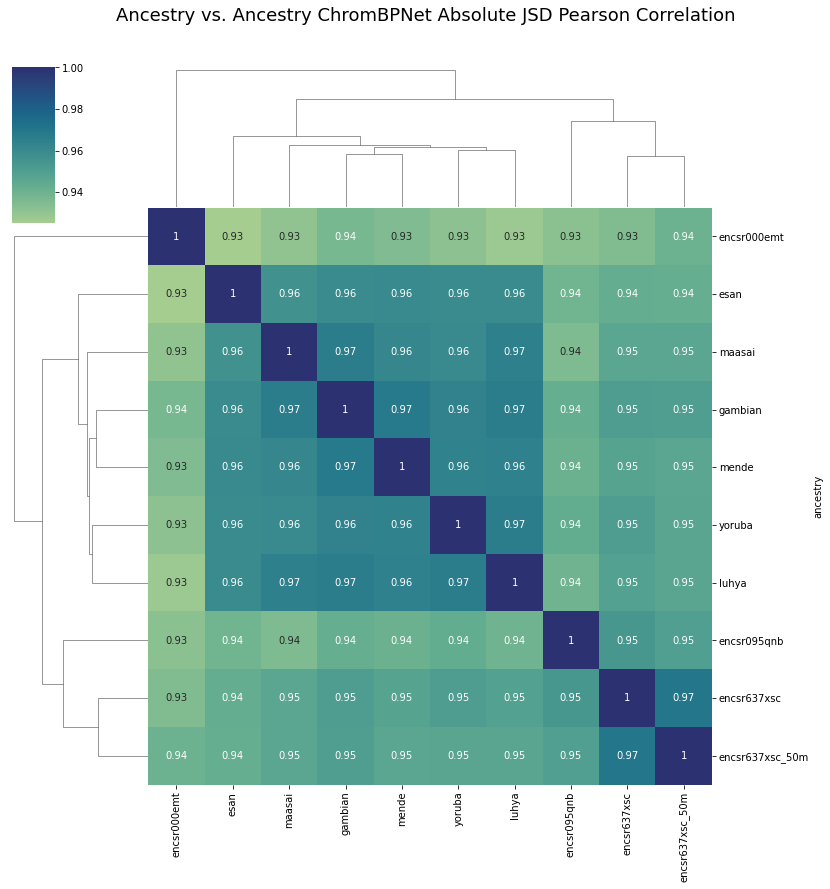

In [49]:
g = sns.clustermap(abs_logfc_df, annot=True, cmap="crest")
g.fig.set_figwidth(12)
g.fig.set_figheight(12)
g.fig.suptitle('Ancestry vs. Ancestry ChromBPNet Absolute JSD Pearson Correlation', fontsize=18, y=1.05)
#plt.savefig("subfigs/afr_caqtls_ancestry_jsd.pdf", transparent=True, dpi=300)


In [50]:
dataf.shape

(6821, 49)

# Pearsonr (ASB)

In [51]:
asb_scores = pd.read_csv("Afr.ASB.CaQTLS.tsv", sep="\t", header=0)

In [52]:
asb_scores = asb_scores[asb_scores["IsUsed"]]

In [53]:
asb_scores.head()

,chr_hg38,pos_hg38,allele1,allele2,IsUsed,rsid,snp_id,meanLog2FC,GM12878.ENCSR637XSC.mean.logfc,GM12878.ENCSR637XSC.mean.sign.jsd,GM12878.ENCSR000EMT.mean.logfc,GM12878.ENCSR000EMT.mean.sign.jsd,GM12878.ENCSR637XSC.sub.50M.mean.logfc,GM12878.ENCSR637XSC.sub.50M.mean.sign.jsd
0,chr1,976215,A,G,True,1_976215_A_G,1_976215_A_G,-1.852605,-0.079329,-0.061612,0.051729,0.032590,0.075894,0.038511
3,chr1,1038819,T,C,True,1_1038819_C_T,1_1038819_C_T,2.390945,-0.223319,-0.023942,-0.044806,-0.014620,-0.109847,-0.020354
4,chr1,1038845,G,A,True,1_1038845_A_G,1_1038845_A_G,2.163432,0.441510,0.035797,0.253871,0.045086,0.377451,0.036387
5,chr1,1038916,G,A,True,1_1038916_A_G,1_1038916_A_G,2.062560,0.083078,0.013802,0.193501,0.028406,0.067928,0.010322
6,chr1,1038975,A,G,True,1_1038975_G_A,1_1038975_G_A,1.898451,-0.210283,-0.012515,-0.028861,-0.012718,-0.105511,-0.015877


In [54]:
pearsonrs = []
keyd='GM12878.ENCSR637XSC.mean.logfc'
print("ChromBPNet ATAC: ", np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[0],2))

keyd='GM12878.ENCSR637XSC.sub.50M.mean.logfc'
print("ChromBPNet ATAC (50M): ", np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[0],2))

keyd='GM12878.ENCSR000EMT.mean.logfc'
print("ChromBPNet DNase (68M): ", np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[0],2))


keyd='GM12878.ENCSR637XSC.mean.logfc'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[1])
keyd='GM12878.ENCSR637XSC.sub.50M.mean.logfc'
print("ChromBPNet ATAC (50M): ", scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[1])
keyd='GM12878.ENCSR000EMT.mean.logfc'
print("ChromBPNet DNase (68M): ", scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[1])


keyd='GM12878.ENCSR637XSC.mean.sign.jsd'
print("ChromBPNet ATAC: ", np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[0],2))

keyd='GM12878.ENCSR637XSC.sub.50M.mean.sign.jsd'
print("ChromBPNet ATAC (50M): ", np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[0],2))

keyd='GM12878.ENCSR000EMT.mean.sign.jsd'
print("ChromBPNet DNase (68M): ", np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[0],2))


keyd='GM12878.ENCSR637XSC.mean.sign.jsd'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[1])
keyd='GM12878.ENCSR637XSC.sub.50M.mean.sign.jsd'
print("ChromBPNet ATAC (50M): ", scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[1])
keyd='GM12878.ENCSR000EMT.mean.sign.jsd'
print("ChromBPNet DNase (68M): ", scipy.stats.pearsonr(asb_scores[keyd], asb_scores["meanLog2FC"])[1])


ChromBPNet ATAC:  0.68
ChromBPNet ATAC (50M):  0.67
ChromBPNet DNase (68M):  0.66
ChromBPNet ATAC:  0.0
ChromBPNet ATAC (50M):  0.0
ChromBPNet DNase (68M):  0.0
ChromBPNet ATAC:  0.66
ChromBPNet ATAC (50M):  0.66
ChromBPNet DNase (68M):  0.67
ChromBPNet ATAC:  0.0
ChromBPNet ATAC (50M):  0.0
ChromBPNet DNase (68M):  0.0


In [55]:
pearsonrs_abs = []
keyd='GM12878.ENCSR637XSC.mean.logfc'
print("ChromBPNet ATAC: ", np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[0],2))
pearsonrs_abs.append(np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[0],2))

keyd='GM12878.ENCSR637XSC.sub.50M.mean.logfc'
print("ChromBPNet ATAC (50M): ", np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[0],2))
pearsonrs_abs.append(np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[0],2))

keyd='GM12878.ENCSR000EMT.mean.logfc'
print("ChromBPNet DNase (68M): ", np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[0],2))
pearsonrs_abs.append(np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[0],2))


keyd='GM12878.ENCSR637XSC.mean.logfc'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[1])
keyd='GM12878.ENCSR637XSC.sub.50M.mean.logfc'
print("ChromBPNet ATAC (50M): ", scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[1])
keyd='GM12878.ENCSR000EMT.mean.logfc'
print("ChromBPNet DNase (68M): ", scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[1])


keyd='GM12878.ENCSR637XSC.mean.sign.jsd'
print("ChromBPNet ATAC: ", np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[0],2))
pearsonrs_abs.append(np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[0],2))

keyd='GM12878.ENCSR637XSC.sub.50M.mean.sign.jsd'
print("ChromBPNet ATAC (50M): ", np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[0],2))
pearsonrs_abs.append(np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[0],2))

keyd='GM12878.ENCSR000EMT.mean.sign.jsd'
print("ChromBPNet DNase (68M): ", np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[0],2))
pearsonrs_abs.append(np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[0],2))


keyd='GM12878.ENCSR637XSC.mean.sign.jsd'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[1])
keyd='GM12878.ENCSR637XSC.sub.50M.mean.sign.jsd'
print("ChromBPNet ATAC (50M): ", scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[1])
keyd='GM12878.ENCSR000EMT.mean.sign.jsd'
print("ChromBPNet DNase (68M): ", scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["meanLog2FC"]))[1])


ChromBPNet ATAC:  0.27
ChromBPNet ATAC (50M):  0.28
ChromBPNet DNase (68M):  0.27
ChromBPNet ATAC:  1.5398565297413478e-102
ChromBPNet ATAC (50M):  2.3953461418137785e-109
ChromBPNet DNase (68M):  4.024120257115456e-96
ChromBPNet ATAC:  0.26
ChromBPNet ATAC (50M):  0.26
ChromBPNet DNase (68M):  0.26
ChromBPNet ATAC:  4.329032818186739e-95
ChromBPNet ATAC (50M):  2.240949272090948e-90
ChromBPNet DNase (68M):  8.346832432824987e-93


In [56]:
df= pd.DataFrame()

df["pearsonr"] = pearsonrs + pearsonrs_abs
df["method"] = ["ChromBPNet ATAC (500M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]*2 + ["ChromBPNet ATAC (500M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]*2
df["scoring"] = ["signed-logfc"]*3 + ["signed-jsd"]*3 + ["unsigned-logc"]*3 + ["unsigned-jsd"]*3

df["pearsonr"] = df["pearsonr"].astype(float)
df

,pearsonr,method,scoring
0,0.68,ChromBPNet ATAC (500M),signed-logfc
1,0.67,ChromBPNet ATAC (50M),signed-logfc
2,0.66,ChromBPNet DNase (68M),signed-logfc
3,0.66,ChromBPNet ATAC (500M),signed-jsd
4,0.66,ChromBPNet ATAC (50M),signed-jsd
5,0.67,ChromBPNet DNase (68M),signed-jsd
6,0.27,ChromBPNet ATAC (500M),unsigned-logc
7,0.28,ChromBPNet ATAC (50M),unsigned-logc
8,0.27,ChromBPNet DNase (68M),unsigned-logc
9,0.26,ChromBPNet ATAC (500M),unsigned-jsd


0     0.68
1     0.67
2     0.66
3     0.66
4     0.66
5     0.67
6     0.27
7     0.28
8     0.27
9     0.26
10    0.26
11    0.26
Name: pearsonr, dtype: float64


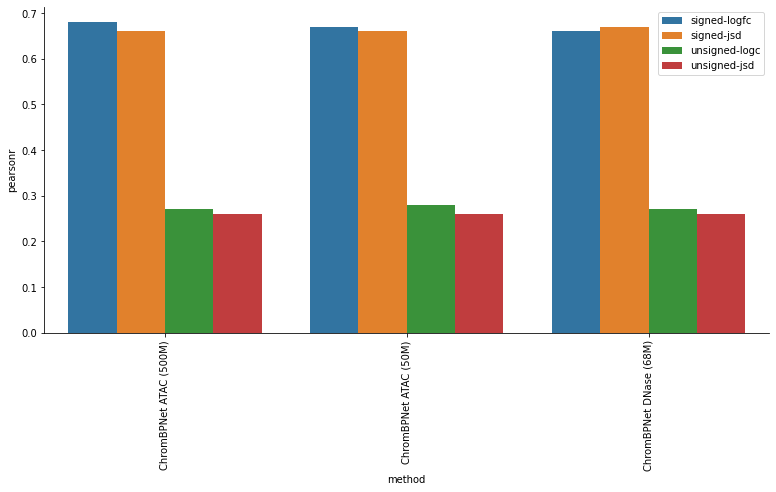

In [57]:
import seaborn as sns
import matplotlib
plt.figure(figsize=(13,6))

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 
print(df["pearsonr"])
ax = sns.barplot(data=df, x="method", y="pearsonr", hue="scoring")
xtix = ["ChromBPNet ATAC (500M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]
ax.set_xticklabels(labels=xtix, rotation=90)
ax.spines[["top", "right"]].set_visible(False)
ax.legend(loc="upper right")
plt.savefig("subfigs/afr_caqtls_asb_pearsonr.pdf", transparent=True, dpi=300)

(0.6848214217530895, 0.0)
(0.27464139750304883, 1.5398565297413478e-102)


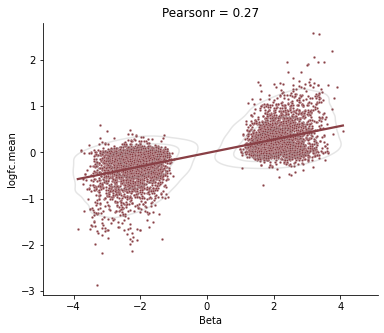

In [58]:

   
data = pd.DataFrame()
data["logfc.mean"] = asb_scores['GM12878.ENCSR637XSC.mean.logfc']
data["Beta"] = asb_scores["meanLog2FC"]

plt.figure(figsize=(6,5))

sns.kdeplot(
    data=data,
    x="Beta",
    y="logfc.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)


ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=6, color="#893f45", rasterized=True)
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="#893f45")
ax.spines[["top", "right"]].set_visible(False)

atc_pear = scipy.stats.pearsonr(data["logfc.mean"],data["Beta"])
print(atc_pear)
atc_pear = scipy.stats.pearsonr(abs(data["logfc.mean"]),abs(data["Beta"]))
print(atc_pear)
ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))


plt.savefig("subfigs/afr_caqtls_asb.pdf", transparent=True, dpi=300)